# Hackathon 1: Online shopper’s intention

The dataset “OnlineIntentionHack1.csv” consists of feature vectors belonging to 12 330 sessions of online shopping on e-commerce website. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

The dataset consists of 6 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label and indicates if a transaction was done during the session. "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce.

The raw dataset is available on the Kaggle website and was used in the article “Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks” of Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).


## Importation of data & descriptive statistics

Import the the dataset "OnlineIntentionHack1.csv" and store in numpy arrays information about the number of pages per session ("Product Related"), duration of sessions ("Product related Duration"), exit rate and specific special day. You may use read_csv() from the panda library.

In [1]:
import pandas as pd
data = pd.read_csv("OnlineIntentionHack1.csv",sep=";")
#Storing values (variables have the initials of what they contain : PR = Product Related)
PR = data['ProductRelated'].values
PRD =  data['ProductRelated_Duration'].values
ER = data['ExitRates'].values
SD = data['SpecialDay'].values

Your study consists in an explanatory analysis of numerical variables and the objectives. 1)	Calculate the mean, variance, median, 25% and 75% quantiles of variables “Product related”, “Product related duration”, “Exit rate”.

In [41]:
import numpy as np

PR_M=np.mean(PR)
PR_sig=np.std(PR); PR_V=PR_sig**2
PR_q25=np.quantile(PR,0.25)
PR_med=np.quantile(PR,0.5)
PR_q75=np.quantile(PR,0.75)
print("Product related :")
print("Mean : "+str(PR_M))
print("Variance : "+str(PR_V))
print("Quantiles 25%, median and 75 % : "+str(PR_q25)+", "+str(PR_med)+", "+str(PR_q75)+"\n")

PRD_M=np.mean(PRD)
PRD_sig=np.std(PRD); PRD_V=PRD_sig**2
PRD_q25=np.quantile(PRD,0.25)
PRD_med=np.quantile(PRD,0.5)
PRD_q75=np.quantile(PRD,0.75)
print("Product related duration :")
print("Mean : "+str(PRD_M))
print("Variance : "+str(PRD_V))
print("Quantiles 25%, median and 75 % : "+str(PRD_q25)+", "+str(PRD_med)+", "+str(PRD_q75)+"\n")

ER_M=np.mean(ER)
ER_sig=np.std(ER); ER_V=ER_sig**2
ER_q25=np.quantile(ER,0.25)
ER_med=np.quantile(ER,0.5)
ER_q75=np.quantile(ER,0.75)
print("Exit Rate :")
print("Mean : "+str(ER_M))
print("Variance : "+str(ER_V))
print("Quantiles 25%, median and 75 % : "+str(ER_q25)+", "+str(ER_med)+", "+str(ER_q75))

Product related :
Mean : 31.76672620980838
Variance : 1979.0518678467668
Quantiles 25%, median and 75 % : 7.0, 18.0, 38.0

Product related duration :
Mean : 1196.1007950808405
Variance : 3664372.132124005
Quantiles 25%, median and 75 % : 185.0, 599.76619045, 1466.47990175

Exit Rate :
Mean : 0.043002538415719396
Variance : 0.0023547076223570133
Quantiles 25%, median and 75 % : 0.014285714, 0.025124489, 0.05


2)	Draw one graph with three box plots for “Product related”, “Product related duration”, “Exit rate” (hint use subplot(…) to manage different scales). You need to import the library "matplotlib.pyplot". Any outliers?

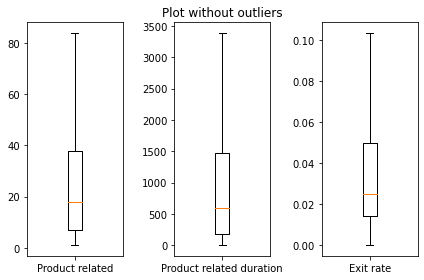

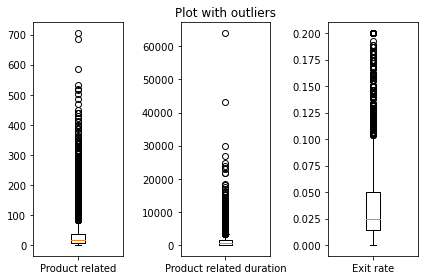

In [3]:
import matplotlib.pyplot as plt
plt.subplot(131)
plt.boxplot(PR,labels=["Product related"],showfliers=False)
plt.subplot(132)
plt.title("Plot without outliers")
plt.boxplot(PRD,labels=["Product related duration"],showfliers=False)
plt.subplot(133)
plt.boxplot(ER,labels=["Exit rate"],showfliers=False)
plt.tight_layout()
plt.show()

plt.subplot(131)
plt.boxplot(PR,labels=["Product related"])
plt.subplot(132)
plt.title("Plot with outliers")
plt.boxplot(PRD,labels=["Product related duration"])
plt.subplot(133)
plt.boxplot(ER,labels=["Exit rate"])
plt.tight_layout()
plt.show()

Any outliers? Please comment.

Answer : The outliers are shown on the box plots as bubbles above or under theoretical extrema. Here, all outliers are higher than the theoretical maximum. The product related outliers can be explained by bots visiting many pages on the website. This theory also fits for the product related duration but this time it is also possible that users leave their laptops without leaving the page, therefore increasing the duration.

3)	Calculate the correlations: “Special day”/“Product related”, “Special day”/ “Product related duration” and “Product related”/“Product related duration”.

In [4]:
SD_PR_cor=np.corrcoef(SD,PR)[0,1]
print("Special day/Product related correlation : "+str(SD_PR_cor)+'\n')
SD_PRD_cor=np.corrcoef(SD,PRD)[0,1]
print("Special day/Product related duration correlation : "+str(SD_PRD_cor)+'\n')
PR_PRD_cor=np.corrcoef(PR,PRD)[0,1]
print("Product related/Product related duration correlation : "+str(PR_PRD_cor))

Special day/Product related correlation : -0.02419457394446043

Special day/Product related duration correlation : -0.03659852448591341

Product related/Product related duration correlation : 0.8608620478649393


4)	Draw two histograms for “Product related”, “Product related duration” in the same plot (hint: subplot(…)).

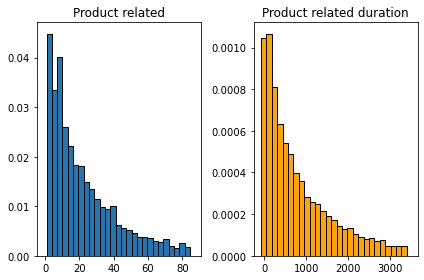

In [5]:
#Removing outliers
IQR=PR_q75-PR_q25
PR_min=PR_q25-1.5*(IQR)
PR_max=PR_q75+1.5*(IQR)

IQR=PRD_q75-PRD_q25
PRD_min=PRD_q25-1.5*(IQR)
PRD_max=PRD_q75+1.5*(IQR)

#Plotting results
plt.subplot(121)
plt.title("Product related")
plt.hist(PR,40,[PR_min,PR_max], 1,edgecolor="k")
plt.xlim(left=-5)

plt.subplot(122)
plt.title("Product related duration")
plt.hist(PRD,40,[PRD_min,PRD_max], 1, facecolor='orange', edgecolor="k")
plt.xlim(left=-250)
plt.tight_layout()
plt.show()

## Parameter estimation by log-likelihood maximization

5)	Fit the exponential and gamma to the random variable “Product related”. For this exercise, you need to import scipy.stats.

i.	Find their parameter estimates by log-likelihood maximization (hint: set location parameter to zero with floc=0 for both distributions). The location parameter is often redundant and causes numerical unstabilities.

In [6]:
import scipy.stats as sc
#Exponential 
_,beta=sc.expon.fit(PR,scale=1,floc=0)
print("Exponential :")
print("Beta :",beta,'\n')
#Gamma
a,_,scale=sc.gamma.fit(PR,scale=1,floc=0)
print("Gamma function :")
print("Parameter a :", a)
print("Scale :", scale)

Exponential :
Beta : 31.76672620980838 

Gamma function :
Parameter a : 0.8553071183683358
Scale : 37.14072469127764


Write 2 functions that calculate the log-likelihoods of the exponential and gamma model. 

In [9]:
#Log-likelihood of the exponential
#Based on the example given in the file "bootstrapping.py" of the course LEPL1109: statistics and data sciences
def log_likelihood_exp(data, beta):
    L = np.zeros(len(data))
    for i in range(0,len(data)):
        y =  sc.expon.pdf(data[i],scale=beta)
        L[i]=np.log(y)
    return sum(L)  

#Log-likelihood of the gamma function
def log_likelihood_gamma(data,a,scale):
    L = np.zeros(len(data))
    for i in range(0,len(data)):
        y =  sc.gamma.pdf(data[i],a,scale=scale)
        L[i]=np.log(y)
    return sum(L)

Select the best model based on log-likelihoods 

In [8]:
ll_exp= log_likelihood_exp(PR, beta)
ll_gamma=log_likelihood_gamma(PR,a,scale)
print("Log-likelihood of the exponential :",ll_exp)
print("Log-likelihood of the gamma function :",ll_gamma)

Log-likelihood of the exponential : -54909.89328582733
Log-likelihood of the gamma function : -54805.66875819063


Which model do you select? 

Answer : In theory, the model that fits the best is the one with the highest log-likelihood. Therefore we will select the model with the gamma function.

Compare empirical and theoretical distributions. For this purpose, plot an histogram of raw data and add the probability density function (pdf) that you have selected for modelling the random variable.

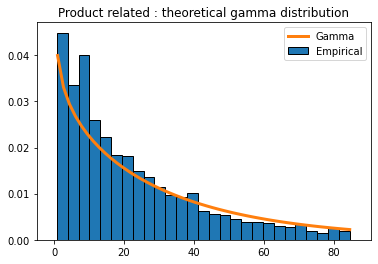

In [25]:
#Computing gamma function (stopped at theoretical max)
x=np.linspace(min(PR),PR_max,50)
gamma=sc.gamma.pdf(x, a, 0, scale)

#Plotting result
plt.title("Product related : theoretical gamma distribution")
plt.hist(PR,40,[PR_min,PR_max], 1,edgecolor="k",label="Empirical")
plt.plot(x,gamma,linewidth=3,label='Gamma')
plt.xlim(left=-5)
plt.legend()
plt.show()

6)	Based on the content of the “Self-learning 2”, implement the bootstrapping method and find 1000 estimates of parameters (1000 simulations) for the distribution of “Product related” with bootstrapped samples of size 1000 (1000 records). Report the following statistics
i.	The means & variances of parameter estimates 
ii.	The 10%-90% confidence interval.
iii.	Plot a histogram of parameter estimates. 
Hint: use the library random to generate a sample.

a estimate :  0.8553120563001458
a variance :  9.40515522358325e-05
a 10%-90% confidence interval : [ 0.84320367783469 ; 0.867718786086247 ]

Scale estimate :  37.16002525729187
Scale variance :  0.5876916296839975
Scale 10%-90% confidence interval : [ 36.14626626699627 ; 38.16914110317557 ]


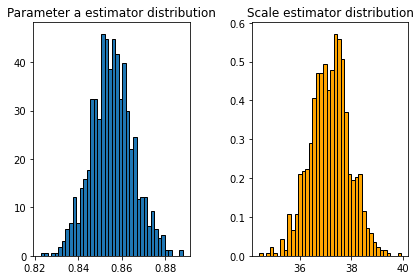

In [38]:
import random as rn

#Creation of a bootsrapping function 
#This function is based on the example given in the file "bootstrapping.py" 
#of the course LEPL1109: statistics and data sciences
def bootstrapping(data,size):
    a_gen=np.zeros(size)
    scale_gen=np.zeros(size)
    for i in range(size):
        n_data=rn.choices(data,k=len(data))
        a_gen[i],_,scale_gen[i]=sc.gamma.fit(n_data,scale=1,floc=0)
    return a_gen, scale_gen

#Using the function with a sample of size 1000
a_gen, scale_gen=bootstrapping(PR,1000)

#Printing results
print("a estimate : ",np.mean(a_gen))      
print("a variance : ",np.std(a_gen)**2)
print("a 10%-90% confidence interval : [",np.quantile(a_gen,q=0.1),';',np.quantile(a_gen,q=0.9),']\n')

print("Scale estimate : ",np.mean(scale_gen))      
print("Scale variance : ",np.std(scale_gen)**2)
print("Scale 10%-90% confidence interval : [",np.quantile(scale_gen,q=0.1),';',np.quantile(scale_gen,q=0.9),']')

#Plotting results
plt.subplot(121)
plt.hist(a_gen,40, density=1,edgecolor="k")
plt.title("Parameter a estimator distribution")

plt.subplot(122)
plt.hist(scale_gen,40, density=1,color='orange',edgecolor="k")
plt.title("Scale estimator distribution")
plt.tight_layout()
plt.show()

7)	Same exercise as 6 but this time you work with bootstrapped samples of size 9000. Compare confidence intervals with the one of point 6). What do you conclude?

a estimate :  0.8553122061030657
a variance :  9.329699196964759e-05
a 10%-90% confidence interval : [ 0.8428953244983338 ; 0.8677368383912935 ]

Scale estimate :  37.147834992056445
Scale variance :  0.5730029058314973
Scale 10%-90% confidence interval : [ 36.180101353941836 ; 38.134514291577844 ]


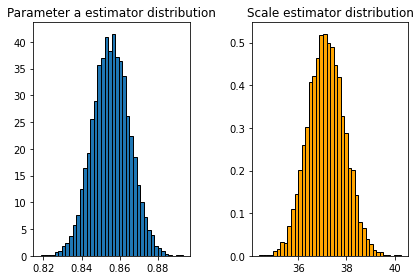

In [42]:
#Using the function created in 6) with a sample of size 9000
a_gen, scale_gen=bootstrapping(PR,9000)

#Printing results
print("a estimate : ",np.mean(a_gen))      
print("a variance : ",np.std(a_gen)**2)
print("a 10%-90% confidence interval : [",np.quantile(a_gen,q=0.1),';',np.quantile(a_gen,q=0.9),']\n')

print("Scale estimate : ",np.mean(scale_gen))      
print("Scale variance : ",np.std(scale_gen)**2)
print("Scale 10%-90% confidence interval : [",np.quantile(scale_gen,q=0.1),';',np.quantile(scale_gen,q=0.9),']')

#Plotting results
plt.subplot(121)
plt.hist(a_gen,40, density=1,edgecolor="k")
plt.title("Parameter a estimator distribution")

plt.subplot(122)
plt.hist(scale_gen,40, density=1,color='orange',edgecolor="k")
plt.title("Scale estimator distribution")
plt.tight_layout()
plt.show()

Observation : There is no significant difference between a bootstrapping of size 1000 and one of size 9000 for this dataset. This may come from the fact that the bootsrapping method converges fast and thus the difference between two estimates becomes very small when the samples are big. In conclusion, since the sample of size 9000 takes way more time to be computed than the 1000 elements sample and brings no significant precision, the sample of size 1000 will rather be used.